For baseline model, we will remove columns which are not important for model.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#load the dataset
df = pd.read_csv('../data/Customer-Churn-Records.csv')


In [9]:
#remove unrelated columns
#rownumber, customer id, and surname are not related to churn prediction
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

#transform categorical columns to numerical (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

#transformed dataset first five rows
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


In [10]:
#train-test split
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

#train-test split (20% test size, 80% train size)
#we use stratify=y to maintain the same proportion of classes in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (8000, 17)
Test set size: (2000, 17)


In [12]:
#before going further, let's train a baseline model using RandomForestClassifier with default parameters
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#make predictions on the test set
y_pred = rf_model.predict(X_test)

print("Baseline model is trained.")

Baseline model is trained.


Accuracy Score:  0.9985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1591    1]
 [   2  406]]


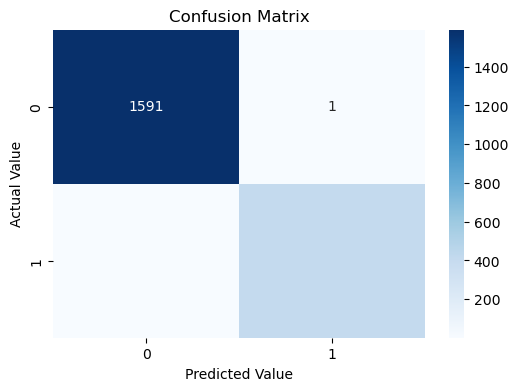

In [13]:
#baseline model results
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

## Baseline Documentation
**Model**: Random forest (default parameters)  
**Feature Set**: RowNumber, CustomerId, Surname are removed. Geography and Gender are one-hot-encoded.   Other numerical values are used with their raw format.  
**Scores**: *Accuracy*: 0.9985  
           *F1 Score*: 1.00  

While 99.85% accuracy is the goal, in real-world problems, it raises a red flag for these reasons:  
1. Overfitting: We need to see if it performs well on a seperate Test/Validation Set.  
2. Data Leakage

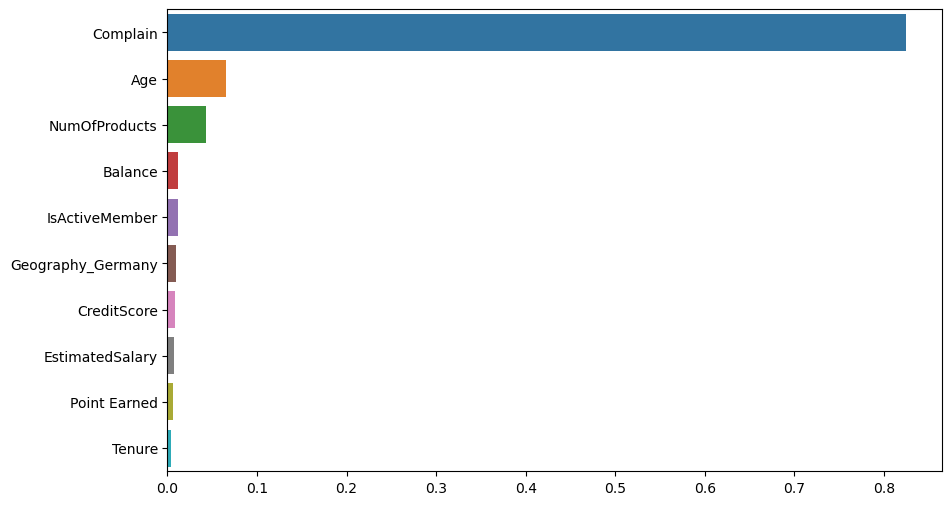

--- KOPYALAYIP ATMAN GEREKEN KISIM ---
Complain             0.824017
Age                  0.065402
NumOfProducts        0.042706
Balance              0.012140
IsActiveMember       0.011210
Geography_Germany    0.009932
CreditScore          0.008234
EstimatedSalary      0.006967
Point Earned         0.006272
Tenure               0.003722
dtype: float64


In [15]:
# Bu kodu modeli eğittiğin yerde çalıştır:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(rf_model.feature_importances_, index=X_test.columns).sort_values(ascending=False)

# Hem grafik çizsin hem de listeyi yazsın
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
plt.show()

print("--- KOPYALAYIP ATMAN GEREKEN KISIM ---")
print(feature_imp.head(10))

In [ ]:
#model tekrar eğitiyorum

new_df = apply_feature_engineering(df)

